### Imports/Settings

In [1]:
import wrangle
import models
import exploration

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [2]:
# plotting defaults
plt.rc('figure', figsize=(11, 5))
plt.style.use('fivethirtyeight')
plt.rc('font', size=16)

# Fossil Fuel Project - Consumption/Production Report

##### Reported by: Craig Calzado  -   Date: April 27, 2022

<h2>Goals</h2>

- Identify any patterns in fossil fuel production and consuption in the United States.
- Determine the trend of the yearly consumption/production of fossil fuels.
- Perdict the Consumption/Production of Fossil Fuel for the next 6 years.

<h2>Executive Summary</h2>

- Fossil fuel production has little to no signifcance by month. Although the consumption of fossil fuel fluctuates by seasonality. Most likley due to heating and cooling elements.
- Fossil fuel production is at an expoential increase based on the data. While fossil fuel consumption is at a steady decline.
- Out of 9 models holts 15/12 proven to be the best for predicting fossil fuel production, where previous year model was the best for prediction of the consumption of fossil fuels.
- For the year 2022-2028 the production of fossil fuel will continue to increaes in an unsure pattern. Where the consumption for the years 2022-2028 will steadily decrease.


## Acquiring and Preparing the Data:

The data for this project is from the [United States Energy Information Administration](https://www.eia.gov/opendata/).

To access the data, we will use the [API](https://www.eia.gov/opendata/register.php).(click the link to register for an API key)

Once registered, we will be able to access the data with an API key.

You will need to create an env.py file that will contain your API key named api_key.

Ensure the env.py file is in the same directory as this notebook and wrangle.py

initial id = '711238' (copy with single quotes)


In [3]:
df = wrangle.total_wrangle('711238')

In [17]:
df

,total_fossil_fuels_production_monthly,total_fossil_fuels_consumption_monthly
date,,
1973-01-01,4932.632,6747.651
1973-02-01,4729.582,6163.095
1973-03-01,4946.902,6044.647
1973-04-01,4716.271,5493.184
1973-05-01,4956.995,5613.551
...,...,...
2021-09-01,6360.590,6065.796
2021-10-01,6726.426,6075.225
2021-11-01,6630.764,6450.370


In [4]:
# Check the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 589 entries, 1973-01-01 to 2022-01-01
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   total_fossil_fuels_production_monthly   589 non-null    float64
 1   total_fossil_fuels_consumption_monthly  589 non-null    float64
dtypes: float64(2)
memory usage: 13.8 KB


Takeaways:
- Acquire the data from the API
- Created a list of the data we want to use
- Transformed the data into workable dataframe
- Added difference is production and consumption
- Created final dataframe for exploration

This results are 589 entries, 1973-01-01 to 2022-01-01 no null values.

## Exploring the data:

While exploring, I split the data into two dataframes so i can keep the data unseen to prevent any data leakage.

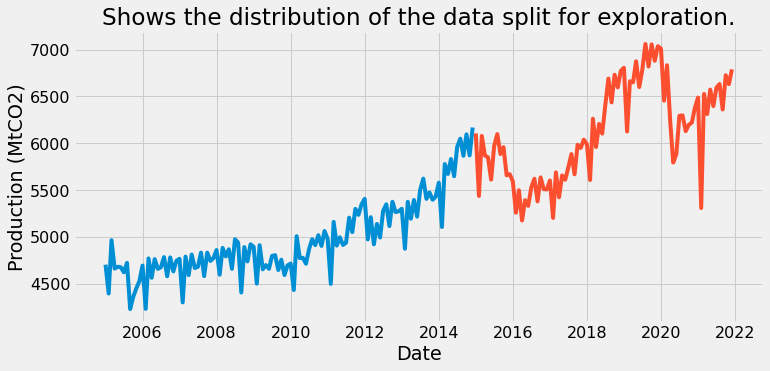

In [5]:
train, test = exploration.explore_split(df)

The visualization above shows the seperation of the two dataframes.

--------------------------------------

I need to answered the following questions:
### 1.) What is the trend of the production and consumption of fossil fuels on a monthly timeframe?

In order to answer this question, we accessed the fossil fuel data over time.

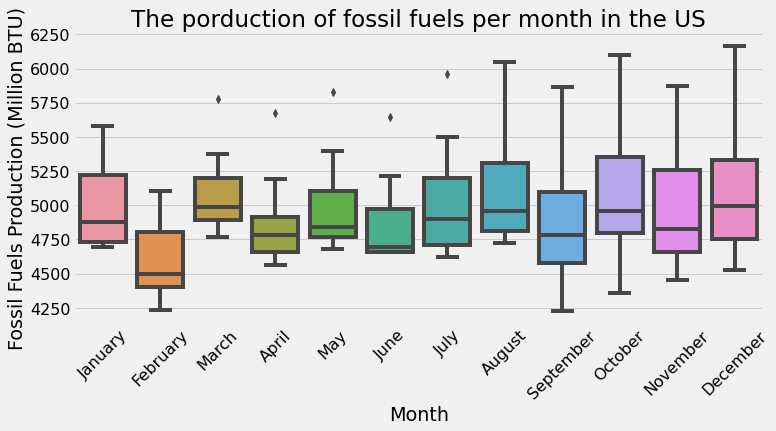

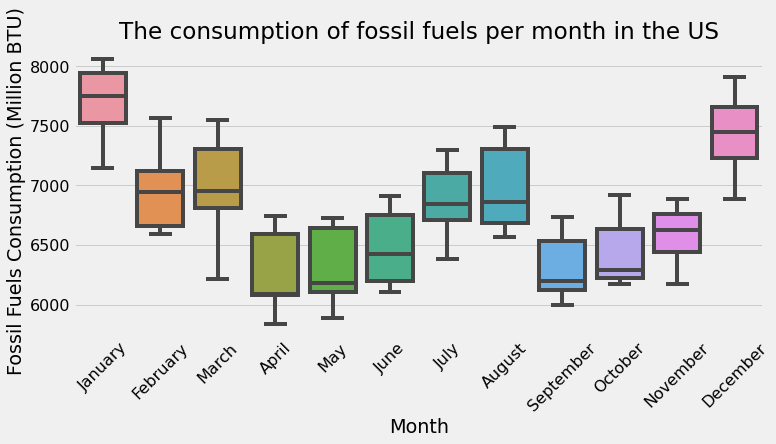

In [6]:
exploration.box_plots(train)

^^^^Above Chart analysis:^^^^

The two visualizations above show the monthly average trend of the production and consumption of fossil fuels.
This is helpul to determine the patterns for predictive analysis.

### Answer to question 1:

#### Fossil fuel production has little to no signifcance by month. Although the consumption of fossil fuel fluctuates by seasonality. Most likley due to heating and cooling elements.


--------------------------------------

This leads to our second question:
### 2.) Is there enough of a trend over years to predict fossil fuel production and consumption?

We will use multiple time series analysis to determine if there is enough of a trend to predict the production and consumption of fossil fuels.

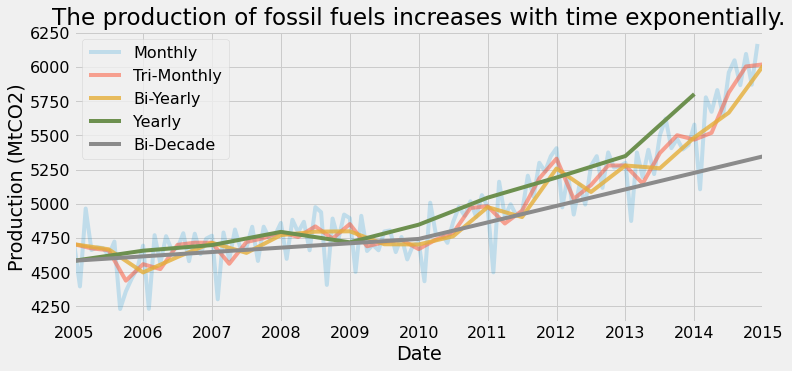

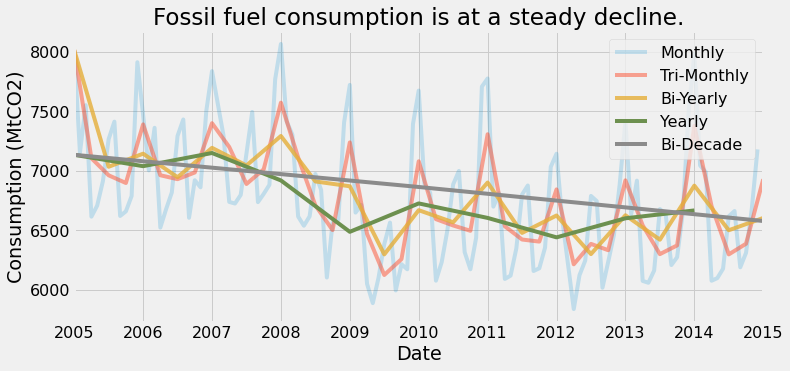

In [7]:
exploration.line_plots(train)

^^^^Above Chart analysis:^^^^

The two charts above show the yearly average trend of the production and consumption of fossil fuels broken down from monthly to Bi-Decade.


### Answer to question 2:
#### Fossil fuel production is at an exponential increase based on the data. While fossil fuel consumption is at a steady decline.
 


---------------------

### Exploratory Summary: 

To begin the exploratory data analysis, I split the data into two dataframes so i can keep the data unseen to prevent any data leakage. Then I utilized datetime to break the data into months to access monthly tends. Once I had the monthly trends, I moved into yearly analysis to determine if the monthly trends follow the yearly trends. They do not...
Monthly treds of the data are different from production and consumption. In terms of monthly there is a seasonal pattern in consumption but not in production. Where yearly trends are more consistent. Yearly production is trending up in an exponential manner, while yearly consumption is steadly trending down.

---------------------

## Modeling the data:

Due to the nature of the models, I needed to split the data into three dataframes. I will model with train and validate but only use test for final model.

In [8]:
train, validate, test = models.split_data_model(df)

^^^Split Analysis:^^^

- train: 102 entries, 2005-01-01 to 2013-06-01
- validate: 61 entries, 2013-07-01 to 2018-07-01
- test: 42 entries, 2018-08-01 to 2022-01-01

Only used dates from 2005-01-01 to 2022-01-01 due to the nature of production and consumption past trends. 

Holts 15/12 model achieved a RMSE score of 364. -- RMSE: 364


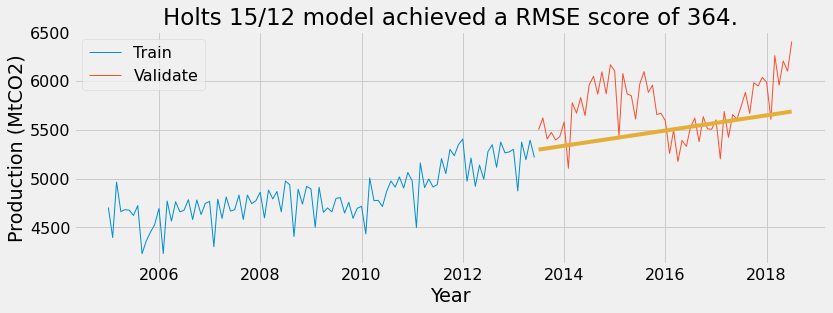

Holts 15/12 model achieved a RMSE score of 645. -- RMSE: 645


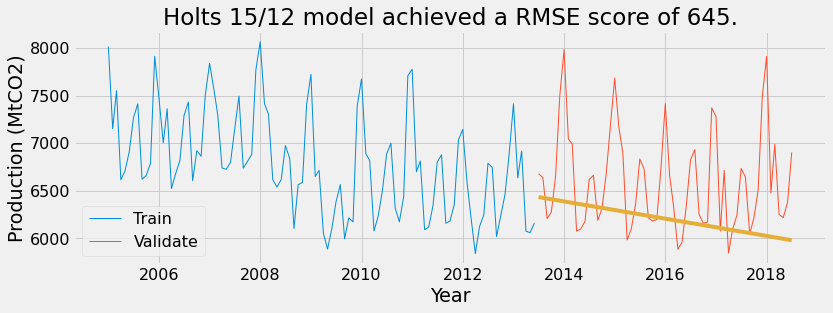

In [10]:
models.holts_15_12_model(train, validate)

^^^Holt 15/12 Model Analysis:^^^

On production the Holt model is able to achive a rmse of 364, where on consumption the model is able to achieve a rmse of 645. 

Previous year model achieved a RMSE score of 648. -- RMSE: 648


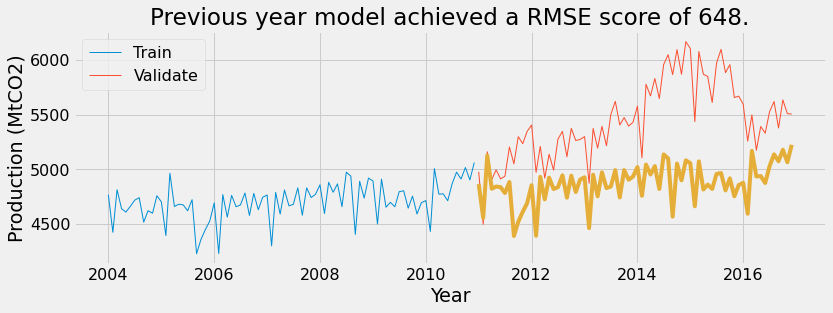

Previous year model achieved a RMSE score of 372. -- RMSE: 372


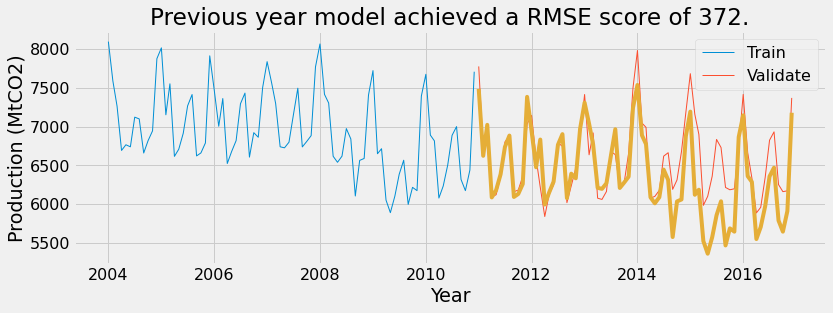

In [11]:
models.previous_year(df)

^^^Previous Year Model Analysis:^^^

On production the Previous year model is able to achive a rmse of 648, where on consumption the model is able to achieve a rmse of 372. 

### Modeling Summary: 

Holts 15/12 model preformed the best on utilizing the train data to predict the validate data on the production of fossil fuels with a rmse of 364. Holts 15/12 model on consumption preformed nearly doubled the rmse at 645. *note: the better rmse is closer to zero*
The previous year model preformed the best on utilizing the train data to predict the validate data on the consumption of fossil fuels with a rmse of 372. The previous year model on production was nearly doubled with the rmse at 372. 
To predict the production of fossil fuels for the next 6 years, I will use the Holt 15/12 model on production and the previous year model on consumption.

---------------------

## Predictions:

This is where the test data is utilized and compare against the predictive data to ensure accuracy.

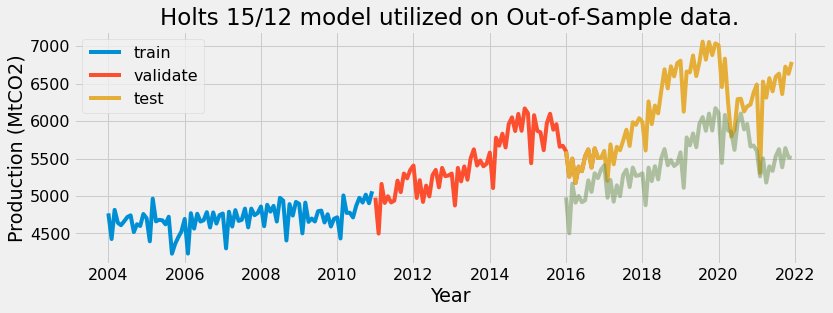

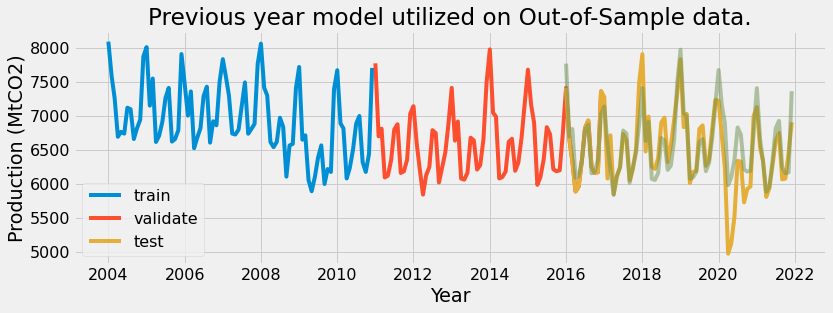

In [12]:
models.conclusion_model(df)

^^^Prediction/Test Analysis:^^^

The visualizations above show the predicted production and consumption of fossil fuels against the unseen test data. The production prediction is below the test data by aproximatly 1000MtC02. The consumption prediction is almost directly inline with the test data.

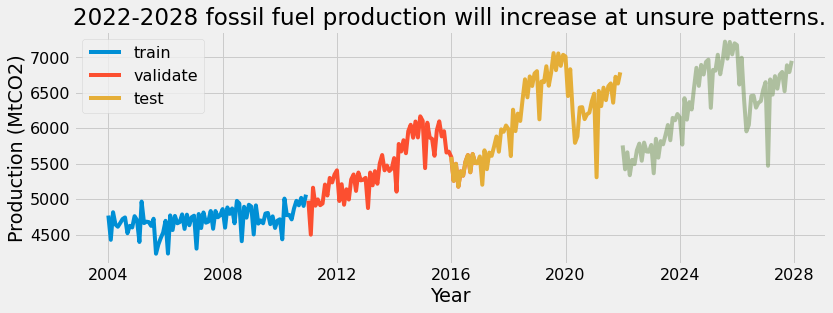

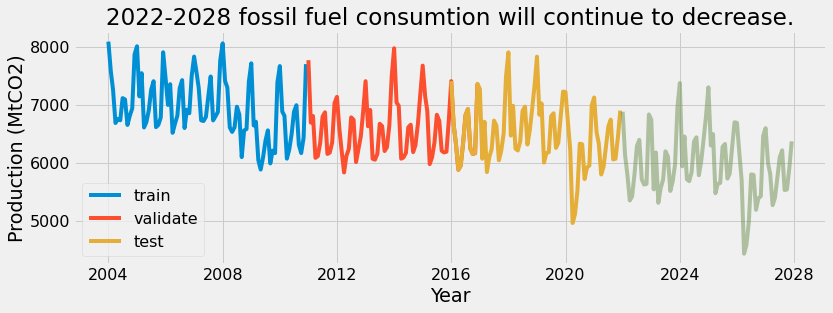

In [13]:
models.prediction_model(df)

^^^Prediction Analysis:^^^

The visualizations above show the predicted production and consumption of fossil fuels for the years 2022-2028. 

---------------------

## Conclusion:

Looking at a month to month cycle the production of fossil fuels has a steady trend unlike the consumption of fossil fuels. The consumption of fossil fuels on a month to month cycle is seasonality peaking consumption in the summer and winter months. If we look at the yearly trends, the production of fossil fuels is at an exponential increase while the consumption of fossil fuels on a yearly cycle is steadily trending down. I utilized 9 models to determine the best model for predicting the production and consumption of fossil fuels. The previous year model was the best for predicting the consumption of fossil fuels and the Holt 15/12 model was the best for predicting the production of fossil fuels. Both models were able to predict the production and consumption of fossil fuels with a rmse in the 300's nearly half the oppsoing.

#### The goals of this project were to:
- Identify any patterns in fossil fuel production and consuption in the United States.
- Determine the trend of the consumption of fossil fuels.
- Perdict the Consumption/Production of Fossil Fuel for the next 6 years.
 
#### Recommendation(s)/Observation(s):
 - As production of fossil fuels increase and the consumption of fossil fuels decrease, we may see a decline in the price of fossil fuels.
 - The consumption of fossil fuels on a monthly cycle is seasonality peaking consumption in the summer and winter months may be due to A/C and Heating.
 - Find alternative energy sources for the summer and winter months.
 - The production of fossil fuels will continue to increase through the years 2022-2028.
 - There is steady decline in the consumption of fossil fuels through the years 2022-2028.

#### Next Steps:
With more time, I would like to:

 - Look into other fuel types and compare the trends of fossil fuels.
 - Look into how to improve the impact of profit by individual products